<a href="https://colab.research.google.com/github/GustavoHDLC1/Colab_Files_PADP/blob/main/PracticaRegresionLinealSimple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Regresión Lineal Simple con Scikit-Learn
---


## Datos del Estudiante

*   Apellidos y Nombre: Hernández De la Cruz Gustavo
*   Matrícula: 261551

---

## Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar la regresión lineal simple utilizando Scikit-Learn para modelar la relación entre dos variables numéricas**, verificar los principales supuestos del modelo (linealidad, normalidad de residuos y homocedasticidad), **interpretar los coeficientes del modelo**, calcular e interpretar la **correlación entre variables** y evaluar el desempeño del modelo mediante métricas como el MSE, RMSE y R².


Trabajarás con el archivo restaurantes.csv, que contiene dos columnas:

- `poblation`: población de la ciudad (variable independiente). Tiene valores decimales mayores que cero. Estos valores representan la población de la ciudad multiplicada por 10,000. Por ejemplo, 6.1101 significa que la población de esa ciudad es 61,101.

- `profit`: ganancia del restaurante en esa ciudad (variable dependiente). Tiene valores decimales, algunos negativos y otros positivos. Estos representan las ganancias mensuales promedio de su restaurante en cada ciudad, en unidades de $10,000. Por ejemplo, 17.592 representa 175,920 en ganancias mensuales promedio para esa ciudad. -2.6807 representa -26,807 en pérdidas mensuales promedio para esa ciudad.





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 🔧 Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `restaurantes.csv`
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente el conjunto de datos.

In [2]:
# Escribe tu código aquí
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
ruta = '/content/drive/MyDrive/MIAAD/PADP/restaurantes.csv'
df = pd.read_csv(ruta)
df.head()

,poblation,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   poblation  97 non-null     float64
 1   profit     97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [4]:
df.describe()

,poblation,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Se tiene una media de 81,598 personas, con una desviación estándar de 38,698 aprox, lo cuál es bastante significativa y un indicador de que las observaciones podrían estar muy dispersas entre si, además de un rango que va de los 50,269 a 222,030 personas en las diferentes poblaciones. Para las ganancias los estadísticos descriptivos muestran un comportamiento similar.

##  Parte 2: Análisis exploratorio y relación entre variables

### 2.1 Diagrama de Dispersión
1. Grafica un **diagrama de dispersión** entre `poblation` y `profit`
2. Responde:  
**¿La relación entre las variables parece lineal? ¿Por qué?**

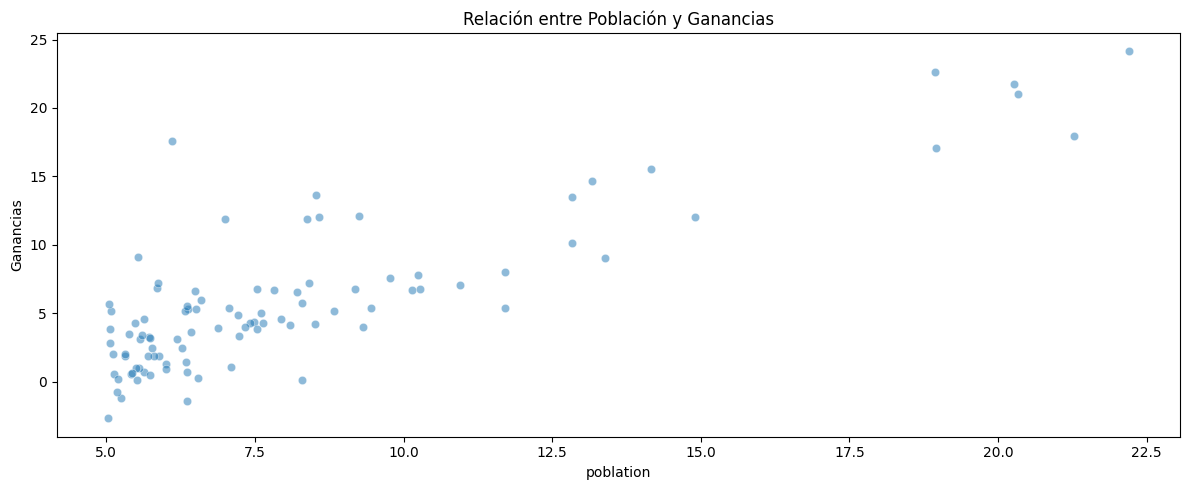

In [12]:
# Diagrama de dispersión
column = 'poblation'
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df[column], y=df['profit'], alpha=0.5)
plt.title(f"Relación entre Población y Ganancias")
plt.xlabel(column)
plt.ylabel("Ganancias")
plt.tight_layout()
plt.show()

El gráfico si muestra una relación lineal, si bien, no es perfecta ya que al inicio las observaciones tienen una dispersión considerable, conforme crece el número de la población, la relación se estabiliza, pareciendo que se puede ajustar una línea recta que se acerque considerablemente a la mayoría de las observaciones

### 2.2: Cálculo e interpretación de la correlación
1. Calcula e imprime el **coeficiente de correlación de Pearson** entre `poblation` y `profit`
2. Interpreta el resultado:
- ¿Qué tan fuerte es la relación?
- ¿Es positiva o negativa?
- ¿Es coherente con el gráfico anterior?

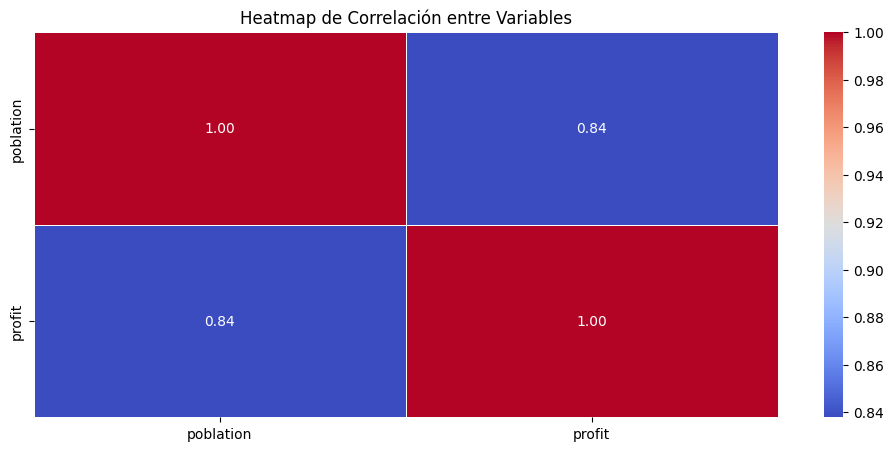

In [14]:
# Cálculo de correlación
plt.figure(figsize=(12, 5))
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title("Heatmap de Correlación entre Variables")
plt.show()

De acuerdo con el coeficiente de correlación de Pearson, se puede decir que existe una correlación alta, ya que es de 0.84, que es muy cercana a 1 y además es positiva, por lo que la relación es directamente proporcional, lo que respalda lo que se veía en el gráfico de dispersión entre las variables.

## Parte 3: Construcción del modelo, coeficientes y visualización

###3.1 Construcción del modelo - obtención de los parámetros y coeficientes
1. Construye un modelo de regresión lineal simple usando las bibliotecas de Scikit-Learn
2. Imprime el intercepto y el coeficiente de la regresión (pendiente)
3. Interpreta el Intercepto: ¿Qué significa en términos del contexto del problema?
4. Interpreta el coeficiente de la regresión (pendiente) ¿Qué significa en términos del contexto del problema?

In [15]:
# Construcción del modelo  y Coeficientes del modelo
X = df['poblation']  # Características
y = df['profit']  # Variable dependiente (precio)

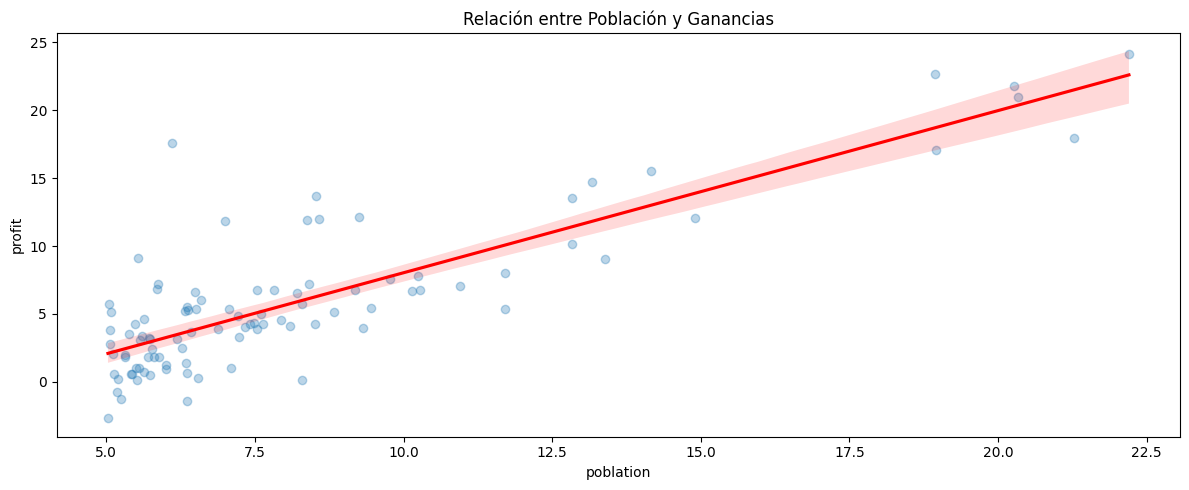

In [20]:
plt.figure(figsize=(12, 5))
sns.regplot(x=X, y=y, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'}) # Se agrega regplot
plt.title(f"Relación entre Población y Ganancias")
plt.tight_layout()
plt.show()

In [22]:
X = np.array(X).reshape(-1, 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = LinearRegression()
model.fit(X_scaled,y)

LinearRegression()

In [26]:
coefficients = model.coef_
intercept = model.intercept_

print(f"\nCoeficientes estimados: {coefficients}")
print(f"Término independiente estimado: {intercept}")
#######################################################
equation = f"Profit = {intercept} + {coefficients[0]} * Población"
equation #se obtiene el modelo con los coeficientes



Coeficientes estimados: [4.59304113]
Término independiente estimado: 5.839135051546391


'Profit = 5.839135051546391 + 4.593041133362872 * Población'

En general esto se interpreta como que independientemente de la población, siempre habrá una ganancia constante de 5.83k aprox, sin embargo, en la práctica no ajusta del todo con el modelo, ya que se observa que en ninguno de los casos, la población es cero, y aún así, existen pérdidas, por lo que en esos casos, este modelo no estaría reflejando la realidad, además se observa que en general, la población aumenta aprox 4.5 veces las ganancias.

### 3.2 Visualización del modelo
1. Grafica los puntos originales (poblation vs profit) y dibuja la línea de regresión ajustada.
2. Asegúrate de incluir leyenda y títulos.

In [27]:
# Visualización del modelo ajustado
y_pred = model.predict(X_scaled)
y_real = y
df_pred = pd.DataFrame({'Real': y_real, 'Predicción': y_pred})

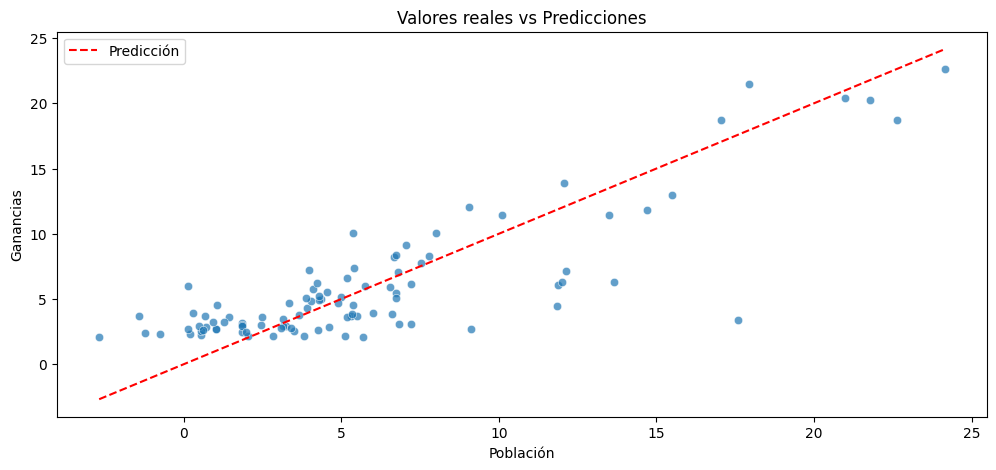

In [29]:
# Gráfico
plt.figure(figsize=(12, 5))
sns.scatterplot(x='Real', y='Predicción', data=df_pred, alpha=0.7)
sns.lineplot(x='Real', y='Real', data=df_pred, color='red', linestyle='--', label='Predicción')
plt.title('Valores reales vs Predicciones')
plt.xlabel('Población')
plt.ylabel('Ganancias')
plt.legend()
plt.show()

En general se observa visualmente un ajuste considerable, donde las predicciones no difieren tanto de los valores reales

## Parte 4: Supuestos del modelo de regresión lineal

### 4.1. Normalidad de los residuos
1. Calcula los residuos (reales - predichos).
2. Grafica un **histograma con KDE** de los residuos.
3. Responde: ¿Los residuos siguen una distribución normal?

In [31]:
# Normalidad de los residuos
df_pred['residuos'] = df_pred['Real'] - df_pred['Predicción']

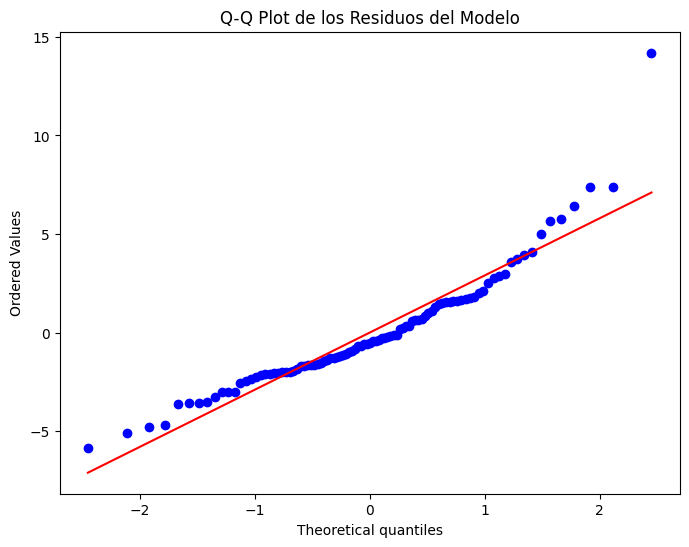

In [33]:
import scipy.stats as stats
# 2. Graficar el Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(df_pred['residuos'], dist="norm", plot=plt)

# Añadir título
plt.title("Q-Q Plot de los Residuos del Modelo")

# Mostrar la gráfica
plt.show()

Visualmente, parece que los datos se ajustan a la recta, lo que podría indicar que provienen de una distribución normal

### 4.2. Homocedasticidad
1. Grafica los residuos vs valores predichos.
2. ¿Los residuos están distribuidos aleatoriamente o muestran un patrón?

In [ ]:
# Gráfico de residuos vs predichos


### 4.3. Q-Q Plot para evaluar la normalidad
1. Grafica el Q-Q Plot:.
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal y b) Desviaciones sistemáticas indican asimetría o colas pesadas.

In [ ]:
# Q-Q Plot


## Parte 5: Evaluación del modelo
1. Calcula las métricas:
- MSE
- RMSE
- R²
2. Interpreta: ¿Qué nos dicen sobre el ajuste del modelo?

In [ ]:
# Evaluación del modelo


## Parte 6: Conclusiones
Responde con tus propias palabras:
- ¿Qué tan útil consideras el modelo?
- ¿Qué limitaciones encuentras?
- ¿Crees que es necesario hacer un ajuste o estandarización a las variables dependientes o independientes?  Si crees que es necesario hacerlo realiza el ajuste.